# 基于SVM的乳腺癌数据集分类

使用支持向量机（SVM）对乳腺癌数据集进行分类，分别使用Sigmoid核、线性核和高斯核进行分类，使用准确率、精确率、召回率、F1分数、ROC曲线等指标对模型进行评估，对模型的决策边界进行可视化，对比两种核函数的分类效果。

## 目录

1. [可视化工具函数](#可视化函数)
   1. [ROC曲线绘制](#ROC曲线)
   2. [混淆矩阵](#混淆矩阵)
   3. [评估指标与分类报告](#评估指标与分类报告)
   4. [决策边界绘制](#决策边界)
2. [数据集](#数据集)
   1. [特征分布](#数据集特征分布)
3. [Sigmoid核函数](#Sigmoid核SVM)
4. [线性核函数](#线性核SVM)
5. [高斯核函数](#高斯核SVM)

In [670]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 设置 matplotlib 中文显示字体
plt.rcParams['font.family'] = 'Microsoft YaHei'

## 可视化函数

### ROC曲线

In [671]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
def draw_roc(y_true, y_score, title):
    # 计算ROC曲线
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    # 计算AUC
    auc = roc_auc_score(y_true, y_score)
    # 绘制ROC曲线
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

### 混淆矩阵

In [672]:
# 绘制混淆矩阵
def draw_confusion_matrix(y_true, y_pred, title):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    # 计算混淆矩阵
    cm = confusion_matrix(y_true, y_pred)
    # 绘制混淆矩阵
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

### 评估指标与分类报告

In [673]:
# 绘制分类报告
def draw_classification_report(y_true, y_pred, title):
    from sklearn.metrics import classification_report
    import seaborn as sns
    import matplotlib.pyplot as plt

    # 计算分类报告
    report = classification_report(y_true, y_pred, target_names=['Benign', 'Malignant'], output_dict=True)
    # 绘制分类报告
    plt.figure()
    sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)
    plt.title(title)
    plt.show()

# 绘制评估指标
def draw_metrics(y_true, y_pred, title):
    from sklearn.metrics import accuracy_score, precision_recall_fscore_support
    import matplotlib.pyplot as plt

    # 计算评估指标
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    # 绘制评估指标
    fig, ax = plt.subplots(figsize=(6, 2))
    metrics = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1-score': f1score}
    labels = list(metrics.keys())
    values = list(metrics.values())
    for idx, value in enumerate(values):
        ax.text(value, idx, f'{value:.4f}', ha='right', va='center')
    bar = ax.barh(labels, values, color='#02ABEC')
    plt.xlim(0, 1)
    plt.title(title)
    plt.show()

### 决策边界

In [719]:
def draw_decision_boundary(X, y, model, title, x_columns, display_features = ['texture_mean', 'concavity_mean']):
    from mlxtend.plotting import plot_decision_regions
    import matplotlib.pyplot as plt

    # 选择两个特征
    feature_idx = [x_columns.index(feature) for feature in display_features]
    filter_idx = [i for i in range(X.shape[1]) if i not in feature_idx]

    # 绘制决策边界
    plot_decision_regions(
        X, y, clf=model, legend=2,
        feature_index=feature_idx,
        filler_feature_values={i: 0 for i in filter_idx},
        filler_feature_ranges={i: 3 for i in filter_idx},
        ax=plt.subplots(1, 1, figsize=(8, 5))[1]
    )

    plt.xlabel(display_features[0], size=10)
    plt.ylabel(display_features[1], size=10)
    plt.title(title, size=12)
    plt.show()

## 数据集

数据集使用 [Kaggle - PRIYANKA/Breast Cancer Wisconsin](https://www.kaggle.com/datasets/priyanka841/breast-cancer-wisconsin) ，

> 数据列: id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst

- `diagnosis`：诊断结果，M代表恶性（malignant），B代表良性（benign）。
- `radius`：细胞核的半径。
- `texture`：灰度值，反映了细胞核的纹理。
- `perimeter`：细胞核的周长。
- `area`：细胞核的面积。
- `smoothness`：半径长度的变化，反映了细胞核的平滑度。
- `compactness`：周长平方除以面积减去1，反映了细胞核的紧密度。
- `concavity`：轮廓的凹部的严重程度。
- `concave points`：轮廓凹部的数量。
- `symmetry`：细胞核对称性。
- `fractal_dimension`：细胞核的分形维数，反映了细胞核的复杂度。

In [675]:
dataset = pd.read_csv("./data/breast cancer.csv")

x_columns = ["radius_mean", "texture_mean", "smoothness_mean", "area_mean", "compactness_mean", "concavity_mean",
             "concave points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", 
             "smoothness_se", "smoothness_worst",  "radius_worst", "concavity_se"]

X = dataset.loc[:, x_columns].values
y = dataset.loc[:, "diagnosis"].values

### 数据集特征分布

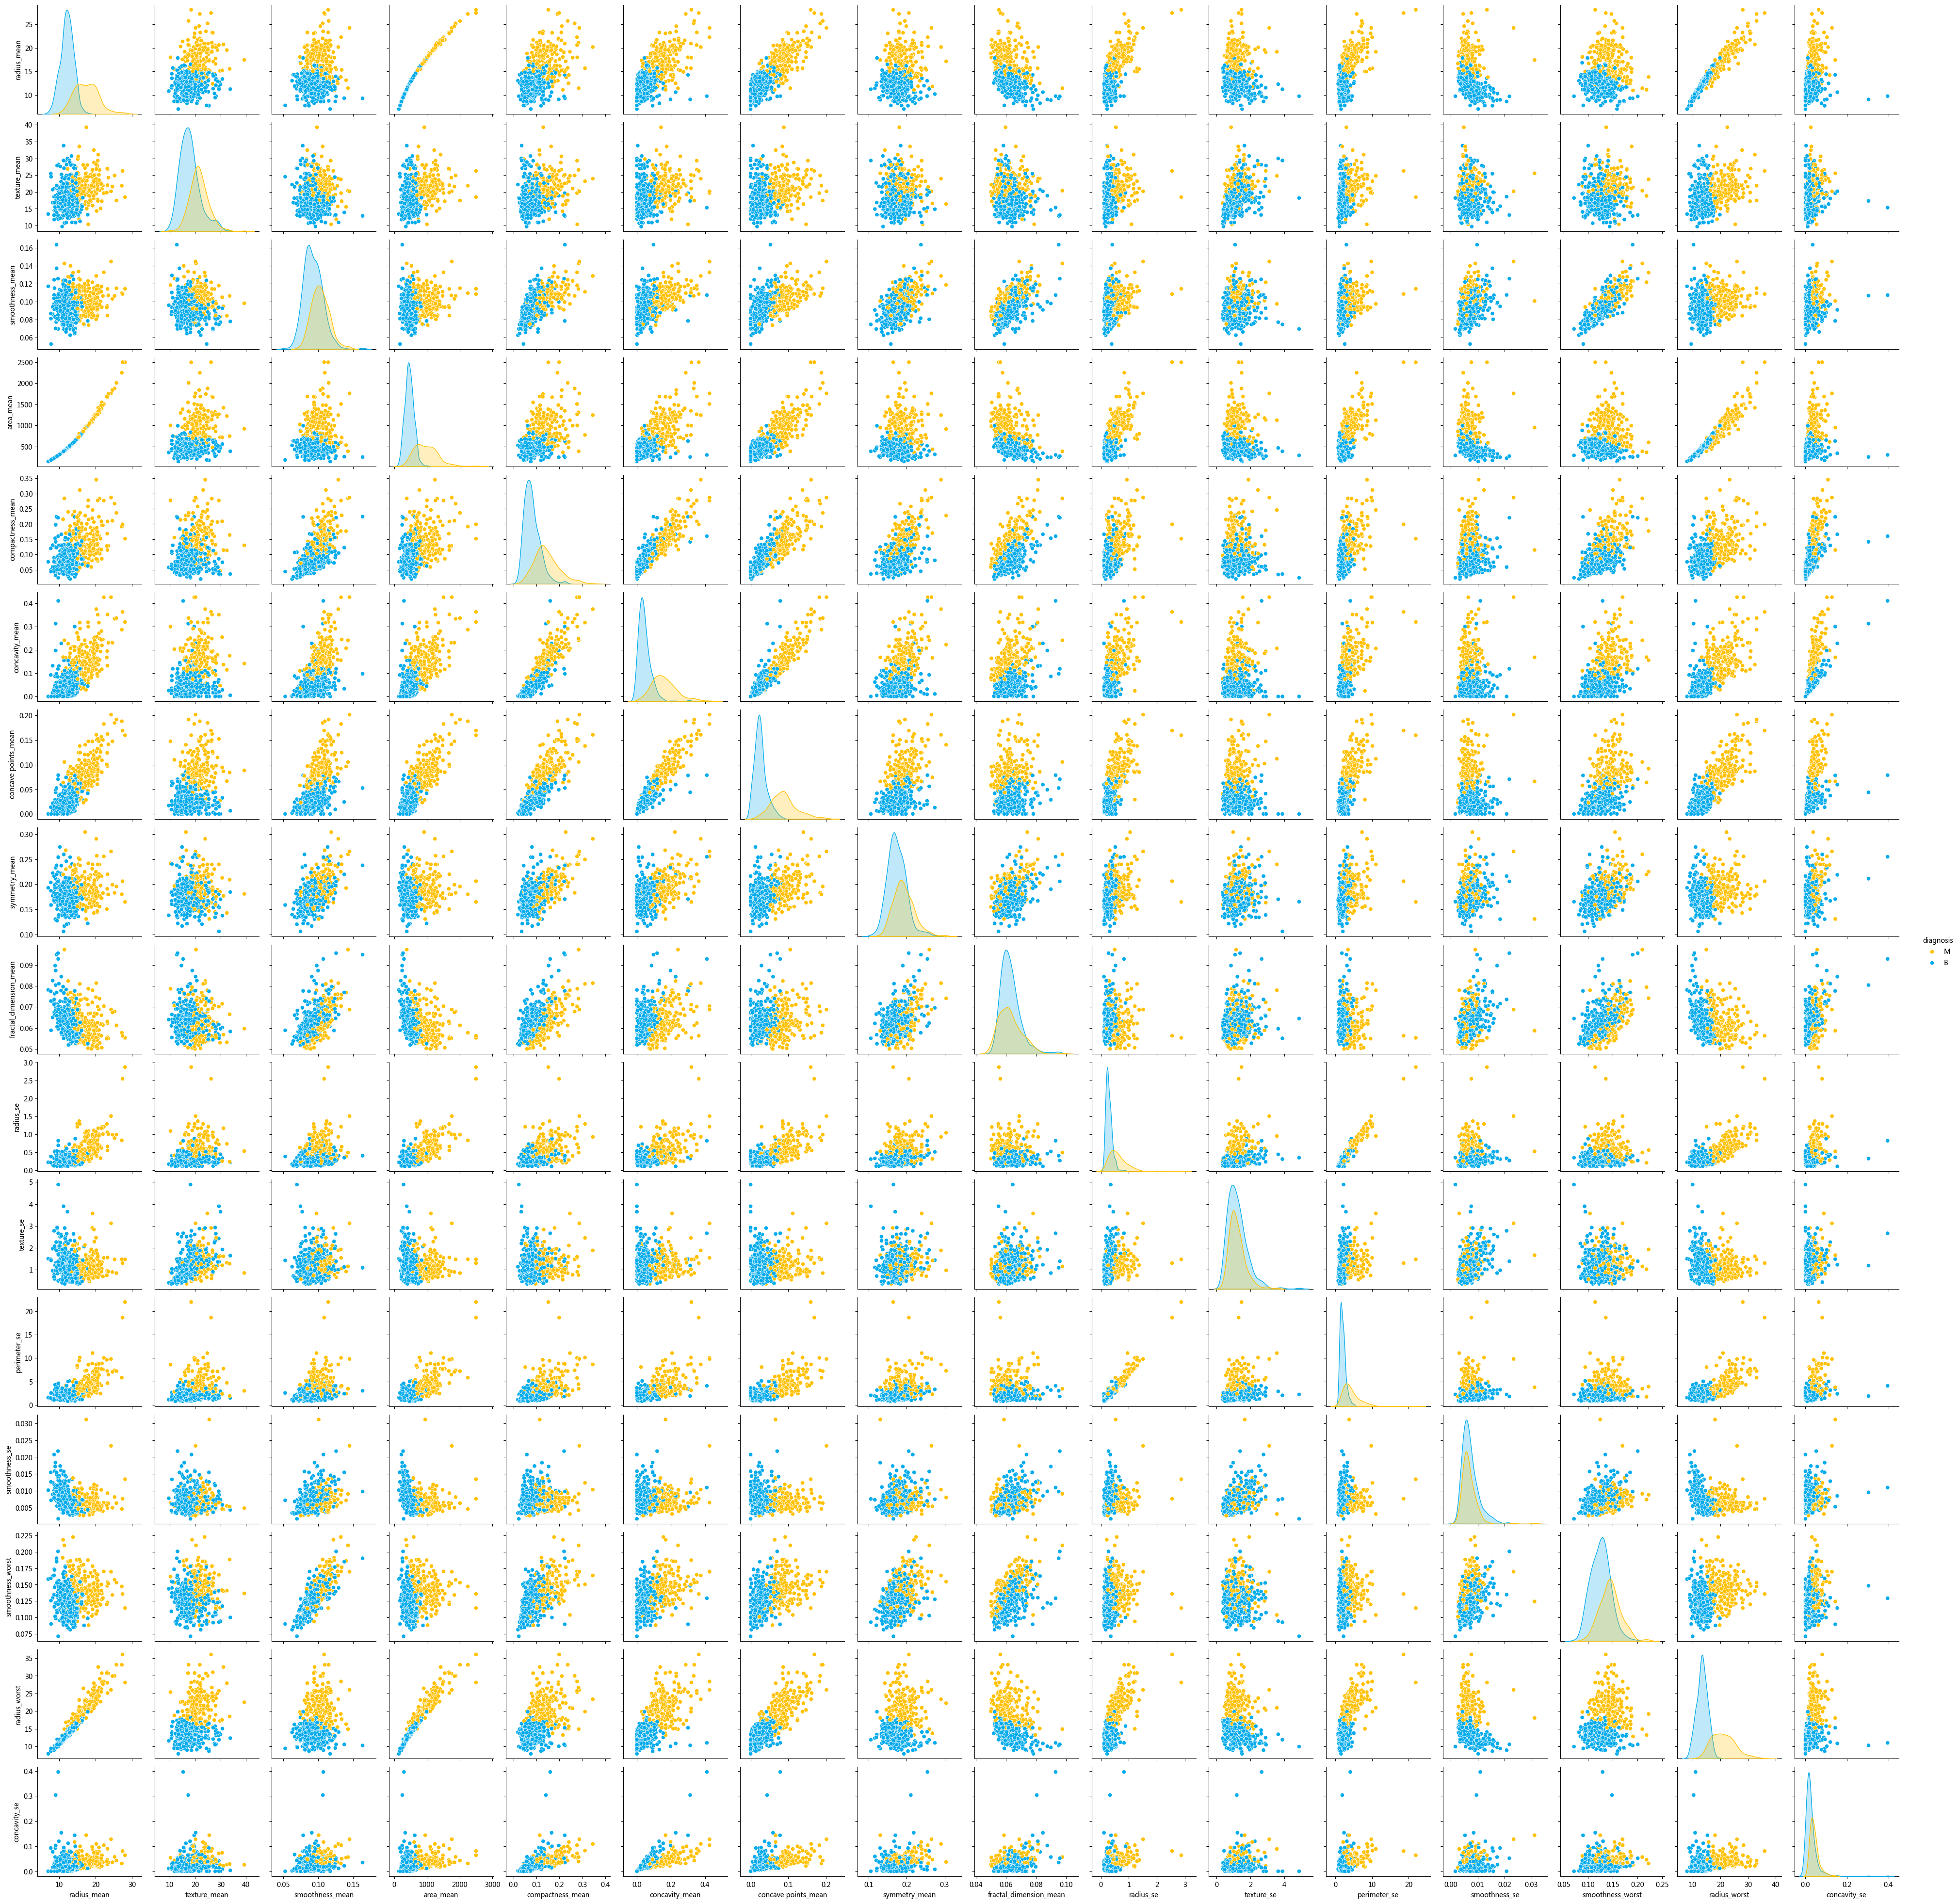

In [676]:
sns.pairplot(dataset.loc[:, [*x_columns, "diagnosis"]],hue = 'diagnosis', palette = {'M': '#FFC000', 'B': '#02ABEC'})

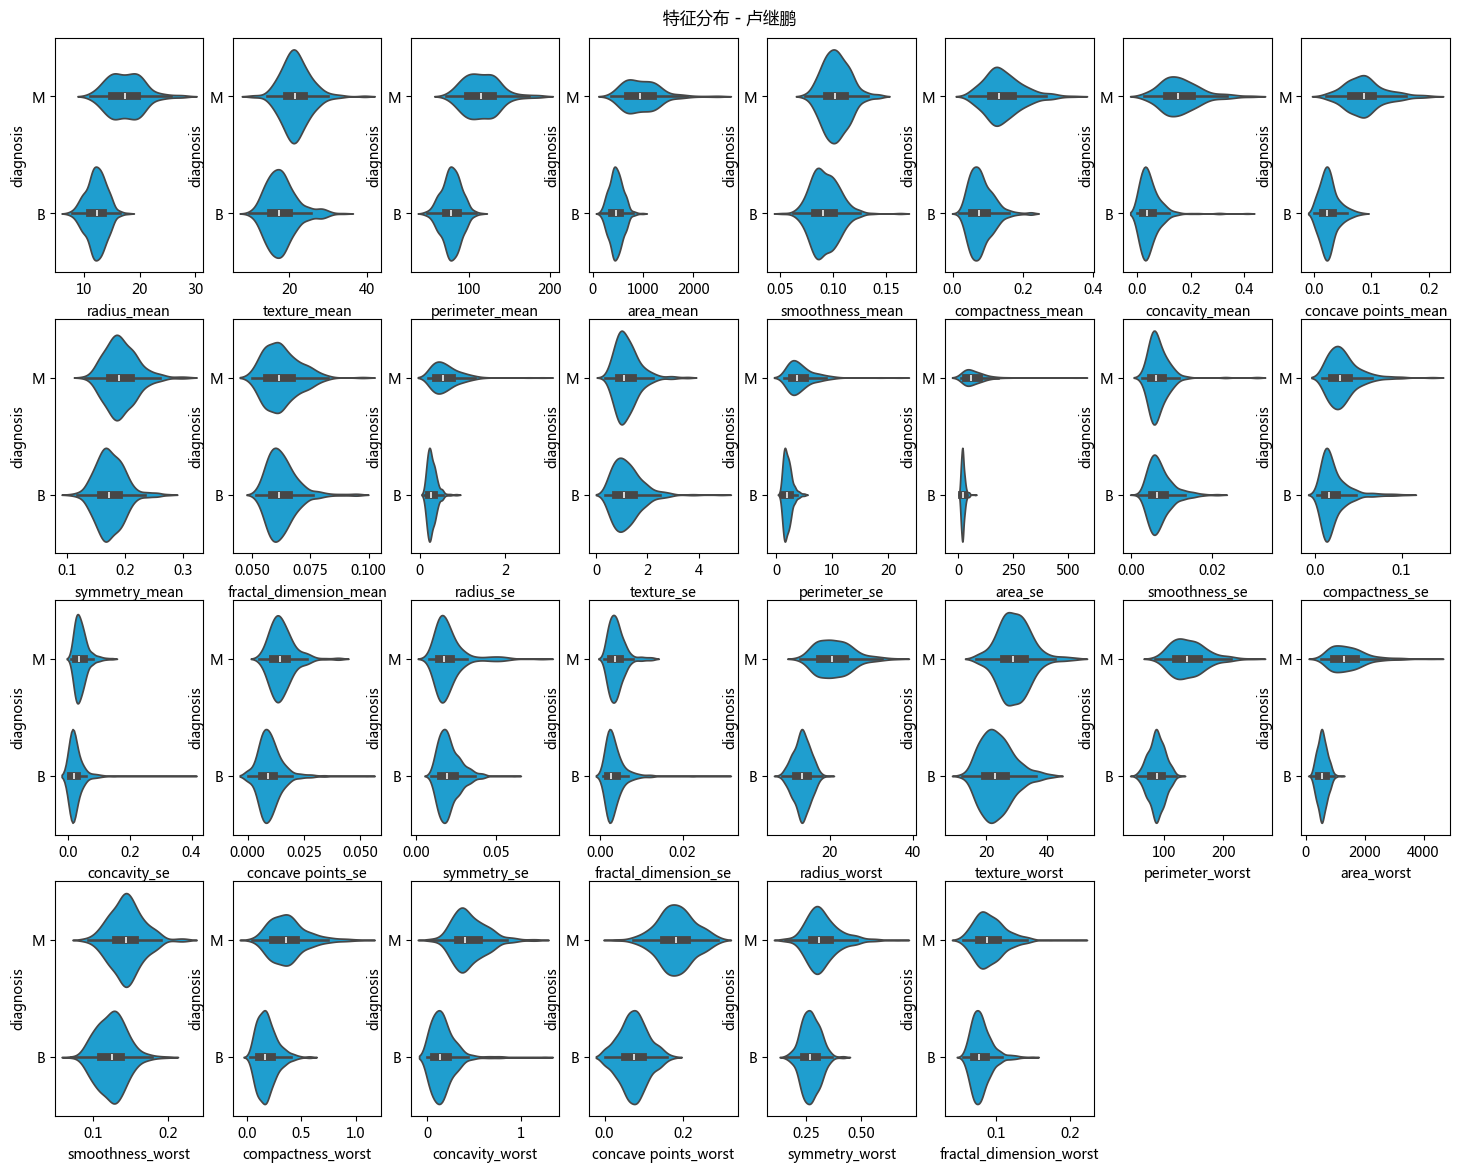

In [712]:

all_x_columns = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]
all_X = dataset.loc[:, all_x_columns].values
df = pd.DataFrame(all_X, columns=all_x_columns)
df['diagnosis'] = y

plt.figure(figsize=(18, 14))
plt.suptitle('特征分布 - 卢继鹏', position=(0.5, 0.90))

for i, col in enumerate(all_x_columns):
    plt.subplot(4, 8, i + 1)
    sns.violinplot(y='diagnosis', x=col, data=df, color='#02ABEC')

plt.show()

将数据集分割为训练集和测试集，其中75%的数据用于训练，25%的数据用于测试。

使用`StandardScaler`对数据进行标准化，使数据的平均值为0，标准差为1。

In [678]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 编码分类标签，将B良性编码为0，M恶性编码为1
y_train = np.where(y_train == 'M', 1, 0)
y_test = np.where(y_test == 'M', 1, 0)

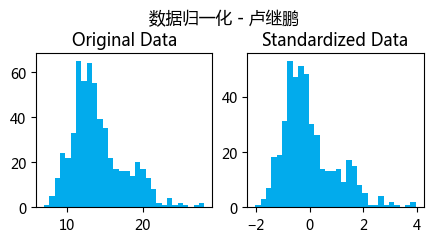

In [679]:
import matplotlib.pyplot as plt

feature_idx = 0

plt.figure(figsize=(5, 2))
plt.suptitle('数据归一化 - 卢继鹏', position=(0.5, 1.1))
plt.subplot(1, 2, 1)
plt.hist(X[:, feature_idx], bins=30, color='#02ABEC')
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.hist(X_train[:, feature_idx], bins=30, color='#02ABEC')
plt.title('Standardized Data')
plt.show()

## Sigmoid核SVM

### 构建模型

使用`scikit-learn`库中的支持向量机对数据进行训练的过程。

创建一个SVC类的实例，使用Sigmoid核函数，并设置随机状态种子为0，以确保结果的可重复性。

使用`X_train`和`y_train`训练SVM分类器。

In [680]:
from sklearn.svm import SVC
classifier_sigmoid = SVC(kernel='sigmoid', random_state=0, probability=True)
classifier_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid', probability=True, random_state=0)

#### 模型决策边界

选择两个特征，使用`plot_decision_regions`绘制分类器的决策边界在这两个特征的投影。可以看到分类器在二维特征空间中的分类效果。

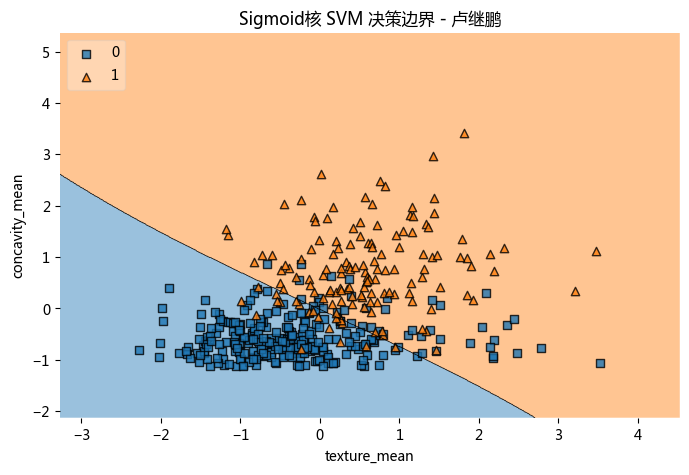

In [723]:
draw_decision_boundary(X_train, y_train, classifier_sigmoid, 'Sigmoid核 SVM 决策边界 - 卢继鹏', x_columns)

### 模型评估

使用`X_test`测试集对模型进行评估。

对比预测结果`y_pred`和实际结果`y_test`，计算准确率。

In [682]:
y_pred_sigmoid = classifier_sigmoid.predict(X_test)

使用`sklearn.metrics`库中的`confusion_matrix`函数，得到混淆矩阵，可以看到模型在测试集上的分类效果。

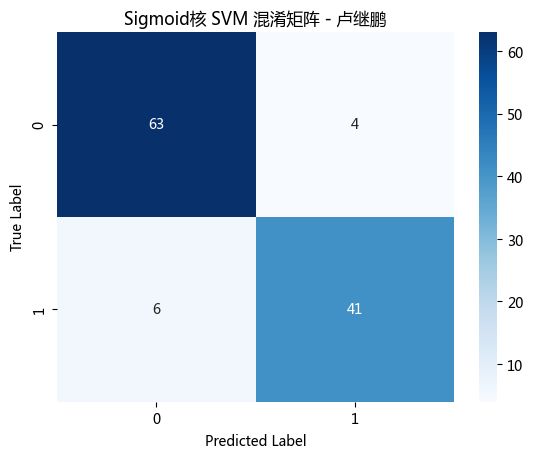

In [683]:
draw_confusion_matrix(y_test, y_pred_sigmoid, 'Sigmoid核 SVM 混淆矩阵 - 卢继鹏')

使用`skilearn.metrics`库中的`accuracy_score`和`classification_report`等函数，得到模型的准确率、精确率、召回率、F1值等评价指标。

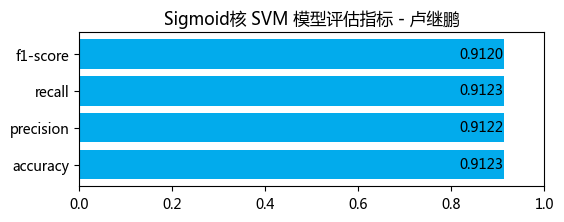

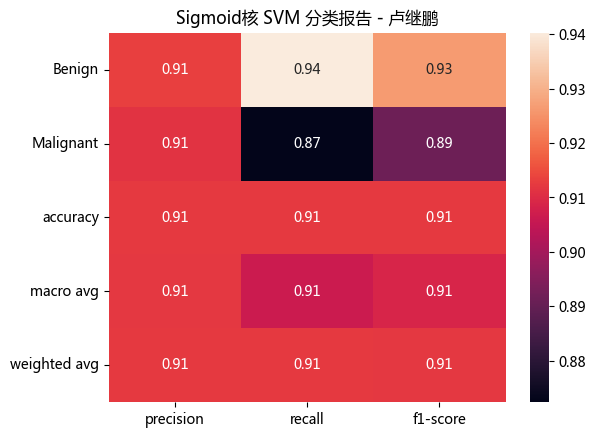

In [684]:
draw_metrics(y_test, y_pred_sigmoid, 'Sigmoid核 SVM 模型评估指标 - 卢继鹏')
draw_classification_report(y_test, y_pred_sigmoid, 'Sigmoid核 SVM 分类报告 - 卢继鹏')

使用`sklearn.metrics`库中的`roc_curve`函数，计算ROC曲线，使用`matplotlib`库绘制ROC曲线，评估模型的分类效果。

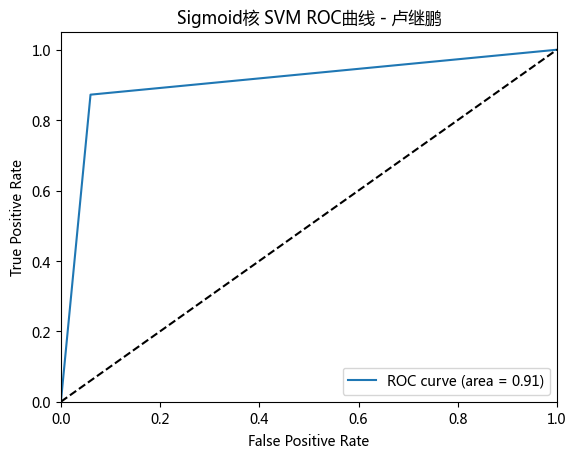

In [685]:
draw_roc(y_test, y_pred_sigmoid, 'Sigmoid核 SVM ROC曲线 - 卢继鹏')

## 线性核SVM

### 构建模型

In [686]:
classifier_linear =SVC(kernel='linear', random_state=0)
classifier_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

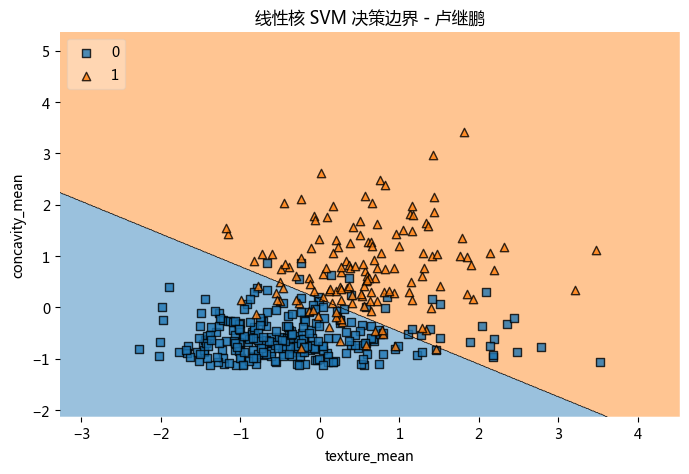

In [722]:
draw_decision_boundary(X_train, y_train, classifier_linear, '线性核 SVM 决策边界 - 卢继鹏', x_columns)

### 模型评估

In [688]:
y_pred_linear = classifier_linear.predict(X_test)

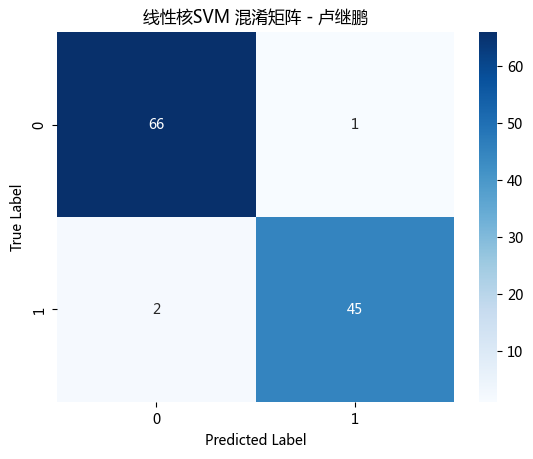

In [689]:
draw_confusion_matrix(y_test, y_pred_linear, '线性核SVM 混淆矩阵 - 卢继鹏')

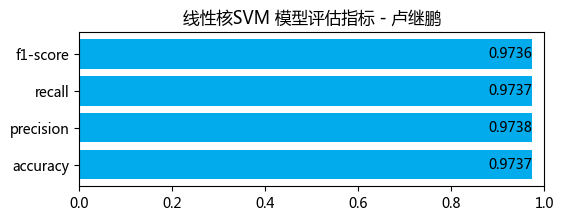

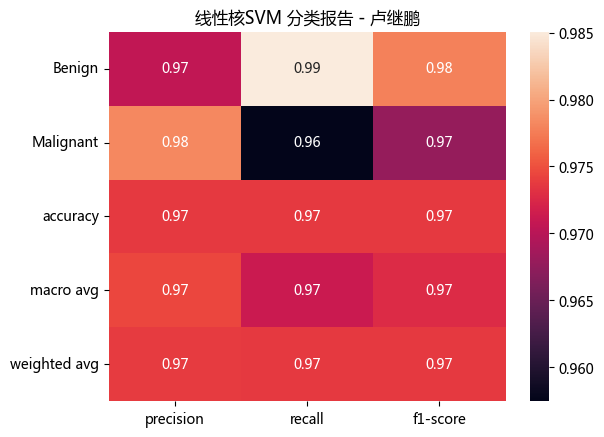

In [690]:
draw_metrics(y_test, y_pred_linear, '线性核SVM 模型评估指标 - 卢继鹏')
draw_classification_report(y_test, y_pred_linear, '线性核SVM 分类报告 - 卢继鹏')

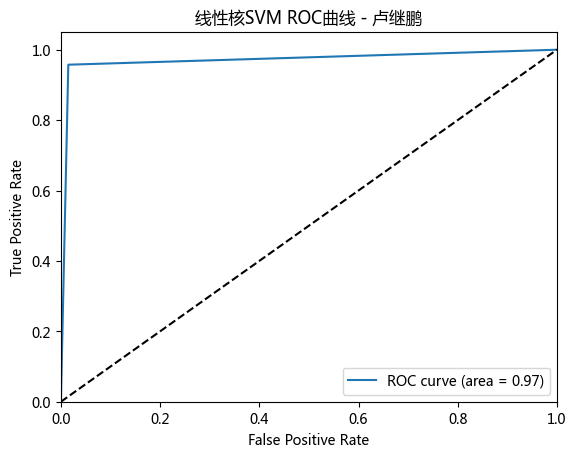

In [691]:
draw_roc(y_test, y_pred_linear, '线性核SVM ROC曲线 - 卢继鹏')

## 高斯核SVM

### 构建模型

In [692]:
classifier_rbf =SVC(kernel='rbf', random_state=0)
classifier_rbf.fit(X_train, y_train)

SVC(random_state=0)

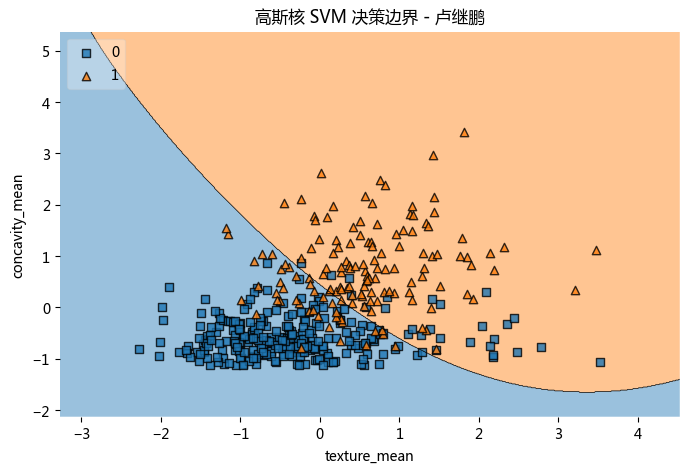

In [724]:
draw_decision_boundary(X_train, y_train, classifier_rbf, '高斯核 SVM 决策边界 - 卢继鹏', x_columns)

### 模型评估

In [694]:
y_pred_rbf = classifier_rbf.predict(X_test)

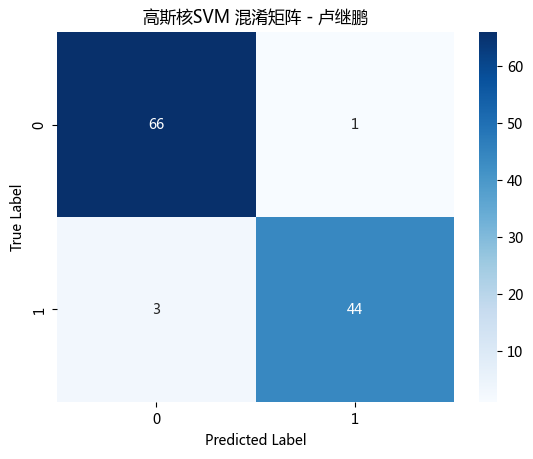

In [695]:
draw_confusion_matrix(y_test, y_pred_rbf, '高斯核SVM 混淆矩阵 - 卢继鹏')

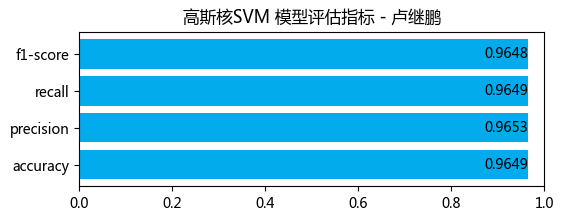

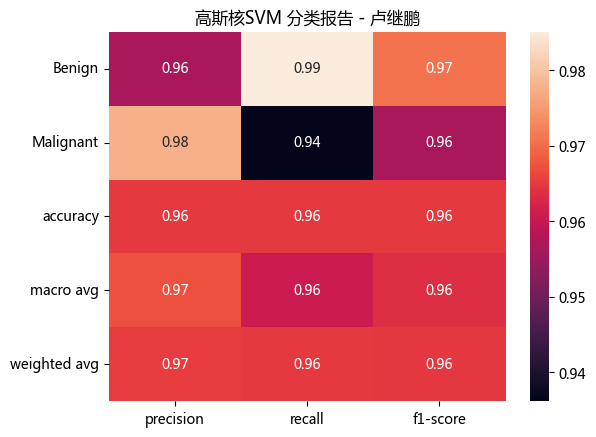

In [696]:
draw_metrics(y_test, y_pred_rbf, '高斯核SVM 模型评估指标 - 卢继鹏')
draw_classification_report(y_test, y_pred_rbf, '高斯核SVM 分类报告 - 卢继鹏')

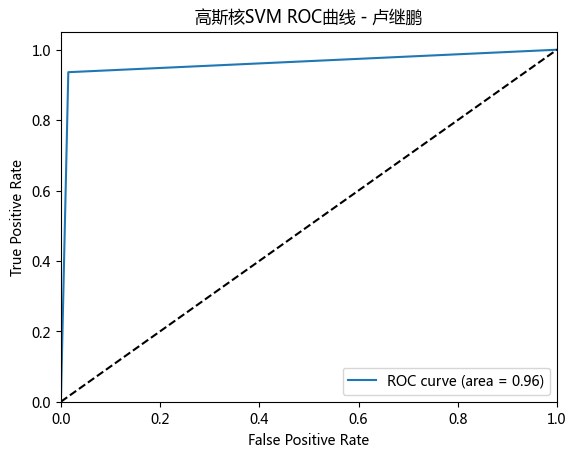

In [697]:
draw_roc(y_test, y_pred_rbf, '高斯核SVM ROC曲线 - 卢继鹏')

## 三种模型的比较

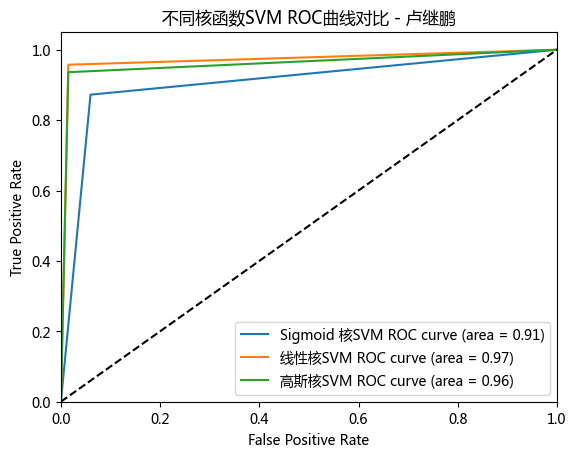

In [698]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_sigmoid)
auc1 = roc_auc_score(y_test, y_pred_sigmoid)

fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_linear)
auc2 = roc_auc_score(y_test, y_pred_linear)

fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_rbf)
auc3 = roc_auc_score(y_test, y_pred_rbf)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr1, tpr1, label='Sigmoid 核SVM ROC curve (area = %0.2f)' % auc1)
plt.plot(fpr2, tpr2, label='线性核SVM ROC curve (area = %0.2f)' % auc2)
plt.plot(fpr3, tpr3, label='高斯核SVM ROC curve (area = %0.2f)' % auc3)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('不同核函数SVM ROC曲线对比 - 卢继鹏')
plt.legend(loc="lower right")
plt.show()